Welcome to the BattETL demo notebook! Here we will go over some of the features of BattETL. If you have not already done so, make sure to setup and install BattETL following the instructions in the README.

Let's begin by importing BattETL and some other packages we will use in the demonstration:

In [1]:
from battetl import BattETL
import re
import os
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

To use BattETL, we must pass the class constructor a configuration file path. This configuration file gives the paths to the data files and test meta information we will store in the BattDB database. It's certainly possible to write configuration file by manually, but we will show some tools here to help build it.

The first thing to do for generating the config is giving a path to the data files. The cell below will auto detect which files are what and generate the correct paths once you provide the path to the directory storing the data files. To start, we recommend setting this point to some of our test data. Just fill in the `battetl_dir` variable with the absolute path to your BattETL directory.

## Create config

In [2]:
#battetl_dir = "YOUR/BATTETL/DIRECTORY/PATH"
battetl_dir = '..'

battetl_demo_data_dir = "tests/data/maccor_cycler_data/simple_data/"
data_directory = os.path.join(battetl_dir,battetl_demo_data_dir)

DATA_FOLDER = os.path.abspath(data_directory)
print(f'Check data folder "{DATA_FOLDER}"')

data_files = []
stats_files = []
schedule_files = []
# list files in data folder
for file in os.listdir(DATA_FOLDER):
    # Maccor: Check if file name ends with number.txt
    if re.search(r'\d+\.txt$', file):
        data_files.append(os.path.join(DATA_FOLDER, file))

    # Maccor: Check if file name ends with [STATS].txt
    elif re.search(r'\[STATS\]\.txt$', file):
        stats_files.append(os.path.join(DATA_FOLDER, file))

    # Maccor: Check if file name ends with .000
    elif re.search(r'\.000$', file):
        schedule_files.append(os.path.join(DATA_FOLDER, file))

    # Check: Check if Arbin data file
    elif ('Wb' in re.split('_',file) and re.split('_',file)[-1].endswith('.CSV')):
        data_files.append(os.path.join(DATA_FOLDER, file))

    # Arbin : Stats file
    elif re.search(r'StatisticByCycle.CSV$', file):
        stats_files.append(os.path.join(DATA_FOLDER, file))

    # Maccor: Check if file schedule file
    elif re.search(r'.sdx$', file):
        schedule_files.append(os.path.join(DATA_FOLDER, file))

# Sort files by name, ascending
data_files.sort(reverse=False)
stats_files.sort(reverse=False)

print(f'>> Found {len(data_files)} data files.')
print('\n'.join(data_files))
print(f'>> Found {len(stats_files)} stats files.')
print('\n'.join(stats_files))
print(f'>> Found {len(schedule_files)} schedule files.')
print('\n'.join(schedule_files))

Check data folder "c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data"
>> Found 1 data files.
c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_Testdata - 079.txt
>> Found 1 stats files.
c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_TestData - 079 [STATS].txt
>> Found 1 schedule files.
c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_Schedule.000


Great! Now that we've found the test we can fill in the fields for the rest of the configuration file below. Note the only required fields are:

- test name
- schedule name
- cell manufacturer
- cell manufacturer part number
- cell manufacturer serial number
- cycler manufacturer 
- cycler manufacturer part number
- cycler manufacturer serial number

In [3]:
config = {
    "timezone": "America/Los_Angeles",
    "data_file_path": data_files,
    "stats_file_path": stats_files,
    "schedule_file_path": schedule_files,
    "meta_data": {
        "test_meta": {
            "cell_id": None,
            "schedule_id": None,
            # Get test name from first data file. The name is before first space.
            "test_name": os.path.basename(data_files[0]).split(' ', 1)[0],
            "start_date": '2020-10-06',
            "end_date": '2020-10-11',
            # Get the channel number from the first data file. The number is before the first dot.
            "channel": int(os.path.basename(data_files[0]).split('.', 1)[0].split(' ')[-1]),
            "ev_chamber": 12,
            "ev_chamber_slot": None,
            "thermocouples": None,
            "thermocouple_channels": None,
            "comments": "Ran at 45 degrees C",
            "project_id": None,
            "test_capacity_mah": 2650,
            "potentiostat_id": None,
            "cycler_id": None,
        },
        "cell": {
            "cell_type_id": None,
            "batch_number": "BATCH_NUMBER", 
            "label": "24",
            "date_received": "2020-09-01",
            "comments": None,
            "date_manufactured": None,
            "manufacturer_sn": "BattGenie_SN",
            "dims": None,
            "weight_g": None,
            "first_received_at_voltage_mv": None,
        },
        "cell_meta": {
            "manufacturer": "BattGenie",
            "manufacturer_pn": "BattGenie_PN",
            "form_factor": "pouch",
            "capacity_mah": 2720,
            "chemistry": None,
            "dimensions": '{"x_mm":"54.25", "y_mm":106.96, "z_mm":3.19}',
            "datasheet": None,
        },
        "schedule_meta": {
            "schedule_name": "BG_Characterization_v1",
            "test_type": "Characterization",
            "cycler_make": "Maccor",
            "date_created": "2020-10-06",
            "created_by": "BattGenie",
            "comments": None,
            "cv_voltage_threshold_mv": None,
            "details": None,
        },
        "cycler": {
            "sn": "SN",
            "calibration_date": None,
            "calibration_due_date": None,
            "location": "BattGenie",
            "timezone_based": None,
        },
        "cycler_meta": {
            "manufacturer": "Maccor",
            "model": "SERIES 4000M",
            "datasheet": None,
            "num_channels": None,
            "lower_current_limit_a": None,
            "upper_current_limit_a": None,
            "lower_voltage_limit_v": None,
            "upper_voltage_limit_v": None,
        },
        "customers": {
            "customer_name": "FakeCustomer"
        },
        "projects": {
            "project_name": "FakeProject"
        }
    }
}

# Deep remove None values from config
config = {k: v for k, v in config.items() if v is not None}
config['meta_data'] = {k: v for k, v in config['meta_data'].items() if v is not None}
config['meta_data']['test_meta'] = {k: v for k, v in config['meta_data']['test_meta'].items() if v is not None}
config['meta_data']['cell'] = {k: v for k, v in config['meta_data']['cell'].items() if v is not None}
config['meta_data']['cell_meta'] = {k: v for k, v in config['meta_data']['cell_meta'].items() if v is not None}
config['meta_data']['schedule_meta'] = {k: v for k, v in config['meta_data']['schedule_meta'].items() if v is not None}
config['meta_data']['cycler'] = {k: v for k, v in config['meta_data']['cycler'].items() if v is not None}
config['meta_data']['cycler_meta'] = {k: v for k, v in config['meta_data']['cycler_meta'].items() if v is not None}

# Save config to file
with open('demo_config.json', 'w') as f:
    json.dump(config, f, indent=4)

Cool! Now you should see a configuration file named `demo_config.json` within this directory. 

Now we can start using BattETL! To do so we pass the BattETL constructor the path (absolute or relative) to the config we just generated:

In [4]:
cell = BattETL(
    config_path='demo_config.json',
)

2023-09-19 11:06:55,611 INFO [utils:24] Load environment variables from c:\BattGenie\BattSoft\BattETL\examples\.env
2023-09-19 11:06:55,612 INFO [utils:48] Load config file from demo_config.json
2023-09-19 11:06:55,614 INFO [utils:57] Loaded config file as json


BattETL consists of three distinct sub-classes:

- Extractor() : Responsible for extracting the raw data from the data files. 
- Transformer() : Responsible for transforming the raw data file to a standard format and calculating some statistics.
- Loader() : Responsible for loading the transformed data to the Battdb database. 

Let's review each of these individually starting with the Extractor. That's as easy as running the following method on our BattETL instance:

In [5]:
cell.extract()

2023-09-19 11:06:55,624 INFO [Extractor:49] Total 1 files
2023-09-19 11:06:55,625 INFO [Extractor:644] Load file path: c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_Testdata - 079.txt
2023-09-19 11:06:55,787 INFO [Extractor:675] Cycle make: maccor. Data type: test_data
2023-09-19 11:06:55,787 INFO [Extractor:59] Extract success
2023-09-19 11:06:55,787 INFO [Extractor:49] Total 1 files
2023-09-19 11:06:55,801 INFO [Extractor:644] Load file path: c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_TestData - 079 [STATS].txt
2023-09-19 11:06:55,803 INFO [Extractor:675] Cycle make: maccor. Data type: cycle_stats
2023-09-19 11:06:55,803 INFO [Extractor:59] Extract success
2023-09-19 11:06:55,803 INFO [Extractor:107] Total 1 files
2023-09-19 11:06:55,803 INFO [Extractor:111] Processing procedure files for Maccor
2023-09-19 11:06:55,803 INFO [Extractor:195] Importing Maccor procedure c:\BattGenie\BattSoft\BattETL\tests\data\mac

That extracts to raw data to Pandas DataFrames:

In [6]:
cell.raw_test_data.head()

,Cyc#,Step,TestTime(s),StepTime(s),Capacity(Ah),Watt-hr,Current(A),Voltage(V),ES,DPt Time,ACR,DCIR,Temp 1,Unnamed: 13
0,0,1,0.00,0.00,0.0,0.0,0.00000,4.16030,0,03/26/2020 11:00:14 PM,0.0,0.0,26.55,NaN
1,0,1,2.00,2.00,0.0,0.0,0.00000,4.15816,1,03/26/2020 11:00:16 PM,0.0,0.0,26.55,NaN
2,0,1,4.00,4.00,0.0,0.0,0.00000,4.15831,1,03/26/2020 11:00:18 PM,0.0,0.0,26.54,NaN
3,0,1,5.00,5.00,0.0,0.0,0.00000,4.15831,129,03/26/2020 11:00:19 PM,0.0,0.0,26.54,NaN
4,0,2,5.01,0.01,0.0,0.0,0.00046,4.15801,0,03/26/2020 11:00:20 PM,0.0,0.0,26.54,NaN


In [7]:
cell.raw_cycle_stats.head()

,Cycle,Cycle Type,Test Time,Current,Voltage,AH-IN,AH-OUT,WH-IN,WH-OUT,ACR,DCIR,T1_Start,T1_End,T1_Min,T1_Max,T1_Start.1,T1_End.1,T1_Min.1,T1_Max.1,Date
0,0,NaN,0d 00:08:59.16,0.099794,4.200122,0.036578,NaN,0.153245,NaN,0,0,26.537836,26.621141,26.537836,26.654465,NaN,NaN,NaN,NaN,43916.964748
1,1,NaN,1d 15:07:52.77,0.099794,4.199969,2.890786,2.903893,10.844129,10.684808,0,0,26.654465,26.587818,26.304579,26.987686,26.487854,26.887722,26.271259,26.904381,43918.588977
2,2,NaN,2d 10:34:38.16,0.099947,4.199969,2.857675,2.860099,10.750550,10.517275,0,0,26.637804,26.471189,26.371225,26.954365,26.554497,27.087656,26.354565,27.154297,43919.399228
3,3,NaN,2d 20:29:43.54,0.099794,4.199817,2.833654,2.832019,10.713035,10.383109,0,0,26.871058,26.571159,26.554497,27.170961,26.421207,27.704117,26.221273,27.704117,43919.812493
4,4,NaN,3d 00:50:34.69,0.099947,4.200122,2.804069,2.801992,10.724095,10.173874,0,0,27.220943,26.671124,26.654465,27.987354,26.521175,29.436874,26.504513,29.436874,43919.993650


We can even see information about our extracted schedule file:

In [8]:
cell.schedule

{'schedule': DashOrderedDict:
 {
     "MaccorProcedure": {
         "header": {
             "BuildTestVersion": {
                 "major": "1",
                 "minor": "5",
                 "release": "7062",
                 "build": "52611"
             },
             "FileFormatVersion": {
                 "BTVersion": "11"
             },
             "ProcDesc": {
                 "desc": null
             }
         },
         "ProcSteps": {
             "TestStep": [
                 {
                     "StepType": "Rest",
                     "StepMode": null,
                     "StepValue": null,
                     "Limits": null,
                     "Ends": {
                         "EndEntry": [
                             {
                                 "EndType": "StepTime",
                                 "SpecialType": null,
                                 "Oper": "=",
                                 "Step": "002",
                                 "

Having the raw data is nice, but part of the power of BattETL is that it standardizes battery data across cyclers to make our analysis easier. Let's now use the Transformer to do just that. We can work directly on the same BattETL instance from before:

In [9]:
cell.transform()

2023-09-19 11:06:55,897 INFO [Transformer:63] Transform test data
2023-09-19 11:06:55,912 INFO [utils:87] Drop unnamed columns
2023-09-19 11:06:55,914 INFO [utils:111] Drop column Unnamed: 13
2023-09-19 11:06:55,927 INFO [Transformer:70] Cycle make: maccor. Data type: test_data
2023-09-19 11:06:55,929 INFO [utils:227] Rename column names to BattETL format
2023-09-19 11:06:55,943 INFO [utils:270] Convert data to milli-
2023-09-19 11:06:56,524 INFO [Transformer:313] Convert datetime and add unixtime_s
2023-09-19 11:06:56,524 INFO [utils:350] Convert recorded_datetime to UTC with timezone America/Los_Angeles
2023-09-19 11:06:56,955 INFO [Transformer:338] Convert column `cycle` to uint16
2023-09-19 11:06:56,958 INFO [Transformer:348] Convert temperature columns to float
2023-09-19 11:06:56,976 INFO [utils:299] Sort DataFrame by ['unixtime_s', 'step']
2023-09-19 11:06:57,974 INFO [Transformer:102] Transform cycle stats
2023-09-19 11:06:57,975 INFO [utils:87] Drop unnamed columns
2023-09-19 

Now we have standardized test data:

In [10]:
cell.test_data.head()

,cycle,step,test_time_s,step_time_s,maccor_capacity_mah,maccor_energy_mwh,current_ma,voltage_mv,es,recorded_datetime,acr,dcir,thermocouple_1_c,unixtime_s,thermocouple_temps_c,charge_capacity_mah,discharge_capacity_mah,charge_energy_mwh,discharge_energy_mwh
0,0,1,0.0,0.0,0.0,0.0,0.0,4160.3,0,2020-03-27 06:00:14+00:00,0.0,0.0,26.55,1585288814,[26.55],NaN,NaN,NaN,NaN
1,0,1,2.0,2.0,0.0,0.0,0.0,4158.16,1,2020-03-27 06:00:16+00:00,0.0,0.0,26.55,1585288816,[26.55],NaN,NaN,NaN,NaN
2,0,1,4.0,4.0,0.0,0.0,0.0,4158.31,1,2020-03-27 06:00:18+00:00,0.0,0.0,26.54,1585288818,[26.54],NaN,NaN,NaN,NaN
3,0,1,5.0,5.0,0.0,0.0,0.0,4158.31,129,2020-03-27 06:00:19+00:00,0.0,0.0,26.54,1585288819,[26.54],NaN,NaN,NaN,NaN
4,0,2,5.01,0.01,0.0,0.0,0.46,4158.01,0,2020-03-27 06:00:20+00:00,0.0,0.0,26.54,1585288820,[26.54],0.0,NaN,0.0,NaN


In [11]:
cell.cycle_stats.head()

,cycle,cycle type,test_time_s,maccor_min_current_ma,maccor_min_voltage_mv,reported_charge_capacity_mah,reported_discharge_capacity_mah,reported_charge_energy_mwh,reported_discharge_energy_mwh,acr_ohm,...,calculated_cc_charge_time_s,calculated_cv_charge_time_s,calculated_cc_capacity_mah,calculated_cv_capacity_mah,calculated_fifty_percent_charge_time_s,calculated_eighty_percent_charge_time_s,calculated_coulombic_efficiency,calculated_discharge_capacity_mah,calculated_discharge_energy_mwh,calculated_discharge_time_s
0,0,NaN,539.16,0.099794,4.200122,36.577804,NaN,153.244853,NaN,0,...,0.0,0.0,0.0,0.0,220.0,360.0,NaN,NaN,NaN,NaN
1,1,NaN,140872.77,0.099794,4.199969,2890.785664,2903.89335,10844.128589,10684.808253,0,...,0.0,0.0,0.0,0.0,34702.0,55522.0,1.004532,2903.89,10680.0,69715.37
2,2,NaN,210878.16,0.099947,4.199969,2857.675195,2860.099388,10750.549863,10517.275027,0,...,0.0,0.0,0.0,0.0,17150.0,27440.0,1.000847,2860.10,10520.0,34327.06
3,3,NaN,246583.54,0.099794,4.199817,2833.653732,2832.018735,10713.034852,10383.109116,0,...,0.0,0.0,0.0,0.0,8502.0,13604.0,0.999425,2832.02,10380.0,16993.84
4,4,NaN,262234.69,0.099947,4.200122,2804.068778,2801.992153,10724.094741,10173.873951,0,...,0.0,0.0,0.0,0.0,3366.0,5386.0,0.999258,2801.99,10170.0,6725.17


And plotting with pandas DataFrames is easy. Here's how one would plot data from the 5th cycle:

Text(0.5, 1.0, 'Example Maccor Test Data for Cycle 5')

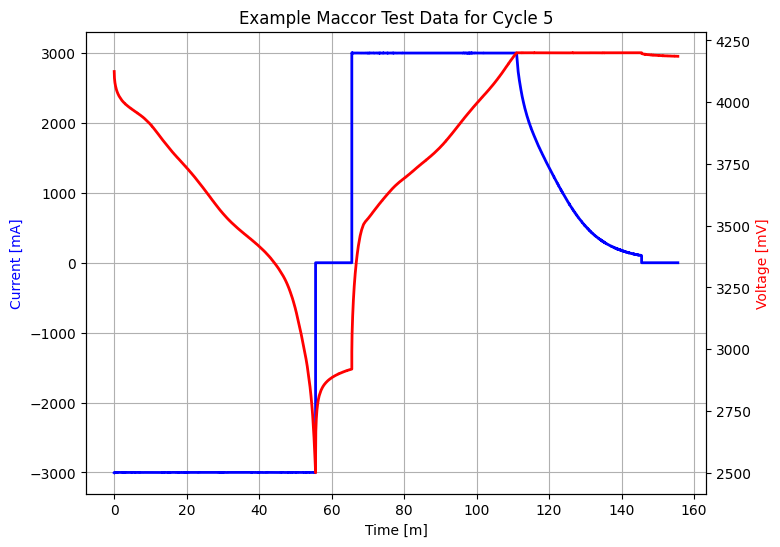

In [12]:
data = cell.test_data
cycle = 5
data = data[data.cycle == cycle]
time_m = (data.test_time_s - data.test_time_s.iloc[0])/60

fig, cur_volt = plt.subplots()
cur_volt.plot( time_m, data.current_ma, linewidth=2, color='b')
label = plt.ylabel('Current [mA]')
label.set_color("blue")

cell_voltage = cur_volt.twinx()
cell_voltage.plot( time_m, data.voltage_mv, linewidth=2, color='r')
label = plt.ylabel('Voltage [mV]')
label.set_color("red")

cur_volt.set_xlabel('Time [m]')
cur_volt.grid(True)
cur_volt.set_title("Example Maccor Test Data for Cycle " + str(cycle))

Now that we've transformed that data we can load it to our BattDB database.

Make sure that you've setup BattDB and included a .env file within this directory that includes the database login credentials.

In [13]:
cell.load()

2023-09-19 11:06:58,853 INFO [utils:24] Load environment variables from c:\BattGenie\BattSoft\BattETL\examples\.env
2023-09-19 11:06:59,249 INFO [Loader:403] Created connection to database battdb
2023-09-19 11:06:59,263 INFO [Loader:453] BattDB schema version 7.3 found in database
2023-09-19 11:06:59,279 INFO [Loader:161] Loading test data to database
2023-09-19 11:06:59,825 INFO [Loader:1078] Latest unixtime_s for test_id=30 is 1585572714
2023-09-19 11:06:59,841 INFO [BattETL:183] Loaded 0 rows of test data to database!
2023-09-19 11:06:59,841 INFO [Loader:229] Loading cycle stats to database
2023-09-19 11:06:59,841 INFO [Loader:487] Move fields to other_details: maccor_discharge_thermocouple_start_c, acr_ohm, maccor_charge_thermocouple_max_c, maccor_discharge_thermocouple_end_c, cycle type, date, maccor_discharge_thermocouple_max_c, maccor_charge_thermocouple_start_c, maccor_charge_thermocouple_end_c, calculated_discharge_time_s, calculated_charge_time_s, maccor_discharge_thermocoupl

Great! Now you should be able to see that data and associated meta data within the BattDB database. 

While it's possible to run the extract, transform, and load steps independently, that can also all be combined into a single line: 

In [14]:
cell.extract().transform().load()

2023-09-19 11:07:00,354 INFO [Extractor:49] Total 1 files
2023-09-19 11:07:00,354 INFO [Extractor:644] Load file path: c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_Testdata - 079.txt
2023-09-19 11:07:00,530 INFO [Extractor:675] Cycle make: maccor. Data type: test_data
2023-09-19 11:07:00,535 INFO [Extractor:59] Extract success
2023-09-19 11:07:00,542 INFO [Extractor:49] Total 1 files
2023-09-19 11:07:00,542 INFO [Extractor:644] Load file path: c:\BattGenie\BattSoft\BattETL\tests\data\maccor_cycler_data\simple_data\BG_Maccor_TestData - 079 [STATS].txt
2023-09-19 11:07:00,544 INFO [Extractor:675] Cycle make: maccor. Data type: cycle_stats
2023-09-19 11:07:00,546 INFO [Extractor:59] Extract success
2023-09-19 11:07:00,546 INFO [Extractor:107] Total 1 files
2023-09-19 11:07:00,546 INFO [Extractor:111] Processing procedure files for Maccor
2023-09-19 11:07:00,546 INFO [Extractor:195] Importing Maccor procedure c:\BattGenie\BattSoft\BattETL\tests\data\mac

And note that the `load()` step did not overwrite any of the existing `test_data`. Before loading test_data, a check is run to only load data that does not already exist in the database, as determined by the `unixtime_s` stamp generated in the `transform()` step.

Thanks for running the demo and please let us know if you have any questions!